Data:
https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years

"Final Database" includes many data for each song. It aggregates the popularity for songs into a single score for each. For each song several variables were retrieved by using Spotify's API (such as artist, country, genre, …)

The dataset reflects the dynamic nature of global music preferences. Certain songs demonstrate universal appeal, consistently appearing across multiple countries' charts, indicating cross-cultural popularity.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>DATASET

In [3]:
csv_file = 'C:\\Users\\user\\Documents\\Mini-projekt_2\\Final database.csv'

In [5]:
df = pd.read_csv('C:\\Users\\user\\Documents\\Mini-projekt_2\\Final database.csv', low_memory=False)

In [74]:
df.head(5)

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [75]:
df.describe()

,Popularity,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,...,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy
count,170633.000000,167411.000000,167411.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,...,170633.00000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000
mean,5417.616264,1337.530228,0.845667,0.651287,0.348684,0.549149,0.015026,0.435795,0.001242,0.011621,...,0.02513,0.040848,0.045044,0.044505,0.019721,0.038328,0.038943,89.926738,0.087035,0.294843
std,13115.854526,2453.554101,0.361269,0.476564,0.476555,0.497580,0.121658,0.495862,0.035226,0.107175,...,0.15652,0.197938,0.207401,0.206215,0.139039,0.191987,0.193460,57.998729,0.281887,0.455974
min,0.800000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,77.600000,428.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,515.150000,834.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000
75%,3867.850000,1240.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138.000000,0.000000,1.000000
max,233766.900000,44128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000,1.000000


In [6]:
df.shape

(170633, 151)

In [78]:
df.isna().sum()

Country        0
Uri            0
Popularity     0
Title          0
Artist         0
              ..
USA            0
Popu_max       0
Top10_dummy    0
Top50_dummy    0
Cluster        0
Length: 151, dtype: int64

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 151 columns):
 #    Column               Non-Null Count   Dtype  
---   ------               --------------   -----  
 0    Country              170633 non-null  object 
 1    Uri                  170633 non-null  object 
 2    Popularity           170633 non-null  float64
 3    Title                170633 non-null  object 
 4    Artist               170633 non-null  object 
 5    Album/Single         170633 non-null  object 
 6    Genre                170633 non-null  object 
 7    Artist_followers     170592 non-null  object 
 8    Explicit             170633 non-null  object 
 9    Album                170633 non-null  object 
 10   Release_date         170633 non-null  object 
 11   Track_number         170633 non-null  object 
 12   Tracks_in_album      170633 non-null  object 
 13   danceability         170633 non-null  object 
 14   energy               170633 non-null  object 
 15 

In [33]:
df.columns

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster'],
      dtype='object', length=151)

Song Attribute -> columns 0-12

0 Country
1 Uri
2 Popularity
3 Title
4 Artist
5 Album/Single
6 Genre
7 Artist_followers
8 Explicit
9 Album
10 Release_date
11 Track_number
12 Tracks_in_album
26 Genre_new
27 Days_since_release
28 Released_after_2017
31 album
32 compilation
33 single 

In [79]:
to_drop = ["Album/Single",
           "Explicit",
           "Album",
           "Track_number",
           "Tracks_in_album",
           "Days_since_release",
           "Released_after_2017",
           "album",
           "compilation",
           "single"]
df.drop(to_drop, inplace=True, axis=1)

>UNDERSTANDING DATA AND VISUALISATION

> most popular genre by number of artists

In [80]:
genre_types = df[["Artist", "Genre"]].groupby("Genre").count()
genre_types.head(10)

,Artist
Genre,
a cappella,58
acid house,3
acoustic chill,7
acoustic opm,6
acoustic pop,159
adoracao,23
adult standards,1616
afghan pop,1
african gospel,2


In [81]:
genre_types.sort_values("Artist", ascending=False, inplace=True)
genre_types.head(5)

,Artist
Genre,
dance pop,25351
latin,7591
pop,7146
k-pop,4053
n-a,3952


In [82]:
genre_types_popular = genre_types.loc[genre_types.Artist > 2500, ["Artist"]]

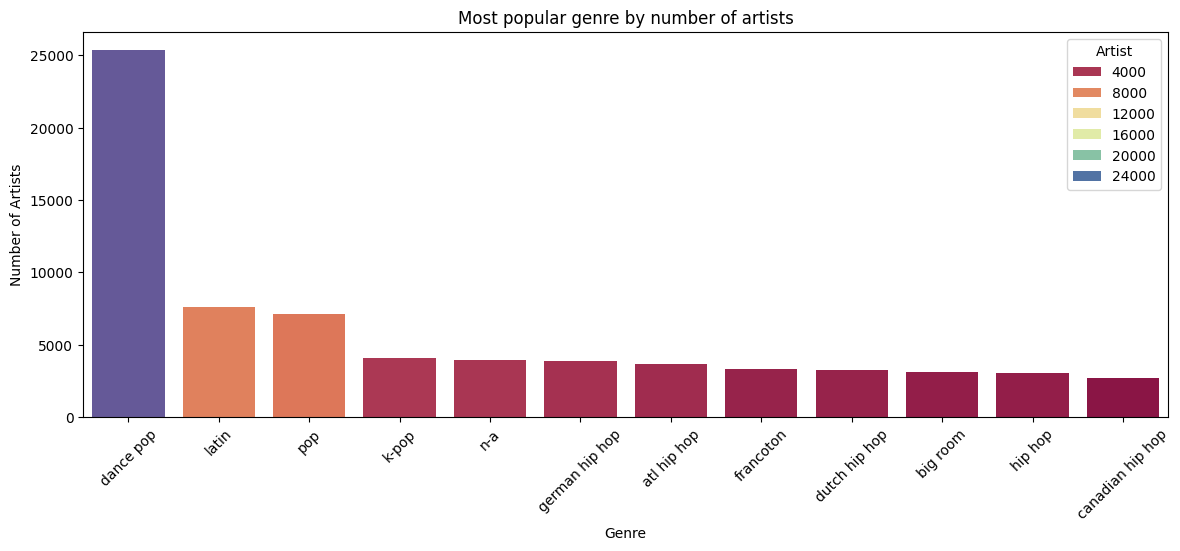

In [30]:
plt.figure(figsize=(14, 5))
sns.barplot(x="Genre", y="Artist", data=genre_types_popular, palette="Spectral", hue="Artist")
plt.ylabel("Number of Artists")
plt.xticks(rotation=45)
plt.title("Most popular genre by number of artists")
plt.show()

> popularity distribution

In [14]:
df.Popularity.describe()

count    170633.000000
mean       5417.616264
std       13115.854526
min           0.800000
25%          77.600000
50%         515.150000
75%        3867.850000
max      233766.900000
Name: Popularity, dtype: float64

Popularity Categories:

0.8 - 77 : Less Popular

77 - 515 : Popular

515 - 3867 : Very Popular

< 3867 : Viral

In [15]:
df.Popularity.value_counts(bins=5, normalize=True).head(20)

(-232.967, 46754.02]      0.977613
(46754.02, 93507.24]      0.019269
(93507.24, 140260.46]     0.002584
(140260.46, 187013.68]    0.000410
(187013.68, 233766.9]     0.000123
Name: proportion, dtype: float64

Value of Popularity distribution:

Range: < 46754 97.7 %

Range: < 93935 2.2 %

Min:0

Max: 233766

Median: 3867

In [16]:
popu = df.loc[df.Popularity < 46754, ["Popularity"]]
popu.Popularity.value_counts(bins=100, normalize=True)

(-45.954, 468.332]        0.498330
(468.332, 935.864]        0.094783
(935.864, 1403.396]       0.051645
(1403.396, 1870.928]      0.035759
(1870.928, 2338.46]       0.027282
                            ...   
(43948.808, 44416.34]     0.000534
(44416.34, 44883.872]     0.000528
(45818.936, 46286.468]    0.000510
(45351.404, 45818.936]    0.000498
(44883.872, 45351.404]    0.000474
Name: proportion, Length: 100, dtype: float64

In [178]:
popu[popu.Popularity <= 75].count()

Popularity    41745
dtype: int64

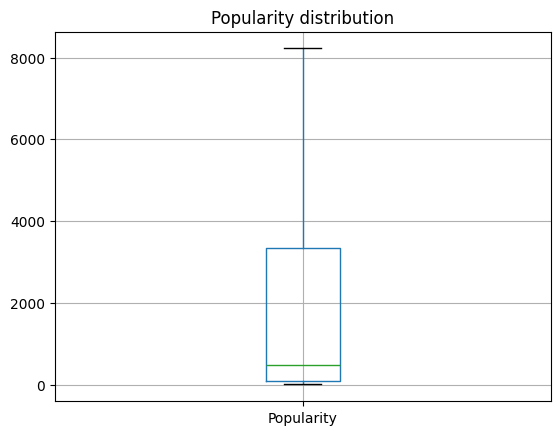

In [180]:
popu.boxplot(showfliers=False)
plt.title("Popularity distribution")
plt.show()

> add column "Popularity_level" 

In [11]:
df.Popularity.describe()

count    170633.000000
mean       5417.616264
std       13115.854526
min           0.800000
25%          77.600000
50%         515.150000
75%        3867.850000
max      233766.900000
Name: Popularity, dtype: float64

In [57]:
df_new_column = df.copy()
df_new_column.insert(3, 'Popularity_Level', '')

In [58]:
val = df_new_column.Popularity
condition = [val > 3867, val > 515, val > 77]
value =['Viral', 'Very Popular', 'Popular']

df_new_column['Popularity_Level'] = np.select(condition, value, 'Less Popular')


In [85]:
df_new_column.Popularity_Level.value_counts(normalize=True)

Popularity_Level
Popular         0.250086
Viral           0.250022
Very Popular    0.249999
Less Popular    0.249893
Name: proportion, dtype: float64

In [86]:
df = df_new_column
df.head(5)

,Country,Uri,Popularity,Popularity_Level,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,Viral,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,Less Popular,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,Viral,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,Very Popular,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,Viral,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


> show correlation between some of the song features and ranking


In [121]:
dfn = df.convert_dtypes()

* Anger_norm2: Number of words related to anger divided by the total number of words found by the dictionary
* Sadness_norm2: Number of words related to sadness divided by the total number of words found by the dictionary
* Joy_norm2: Number of words related to joy divided by the total number of words found by the dictionary
* Fear_norm2: Number of words related to fear divided by the total number of words found by the dictionary

In [123]:
numeric_cols = ['Popularity', 'anger_norm2', 'sadness_norm2', 'joy_norm2', 'fear_norm2', 'Popu_max', 'Top50_dummy', 'Top10_dummy']

In [124]:
corr = dfn[numeric_cols].corr()

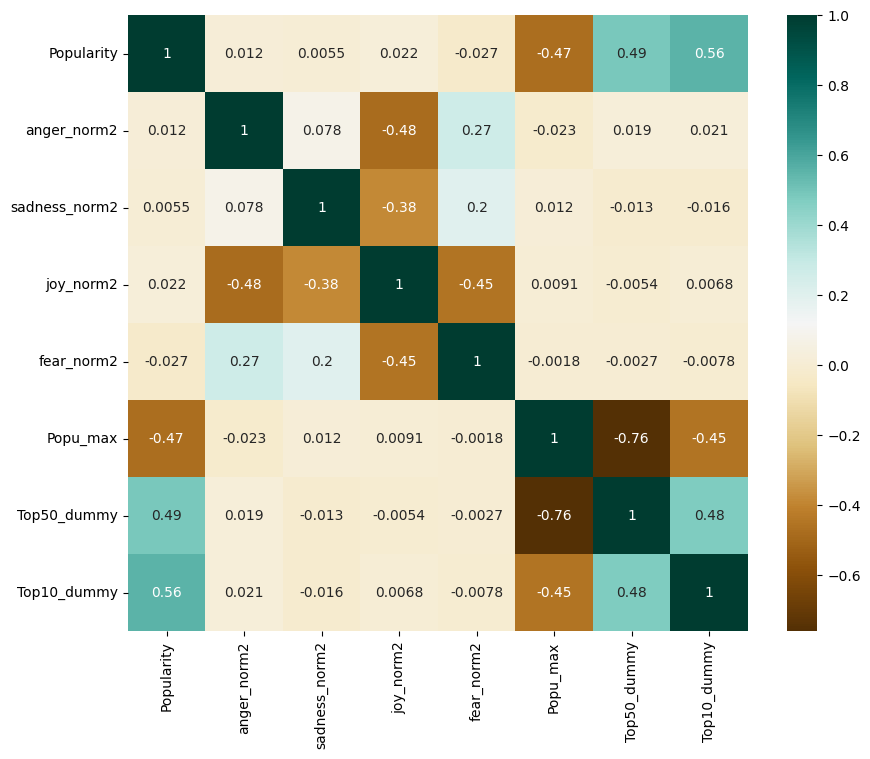

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BrBG")
plt.show()

In [139]:
bayes = df[["Title"]].groupby(df["Bayes"]).count()
bayes

,Title
Bayes,
-1.0,41868
0.0,4001
1.0,25997


> Topic of the lyrics according to the categories

In [48]:
lyrics_topic = df[['Title']].groupby(df['LDA_Topic']).count()
lyrics_topic


,Title
LDA_Topic,
Celebrate,4517
Desire,6209
Explore,13069
Fun,3492
Hope,18620
Love,11666
Nostalgia,4951
Thug,9342


<Axes: xlabel='LDA_Topic'>

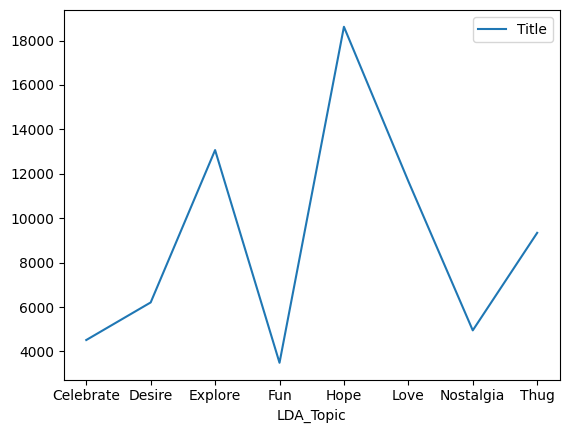

In [50]:
lyrics_topic.plot()

>> insight: the most popular topic of the lyrics is: "Hope" - 18620 songs. "Fun" categorie describes only 3492 songs, which is suprising, because "Dance pop" is the most popular genre and could be associated with fun

In [49]:
genre_types_popular.head(5)

,Artist
Genre,
dance pop,25351
latin,7591
pop,7146
k-pop,4053
n-a,3952


> most popular artists (by sum of popularity of songs)


In [107]:
artist_popu = df[["Artist", "Popularity"]].groupby("Artist").count()
artist_popu.sort_values("Popularity", ascending=False, inplace=True)
artist_popu.head(10)

,Popularity
Artist,
Ariana Grande,1487
Drake,1473
BTS,1376
Taylor Swift,1285
XXXTENTACION,989
Ed Sheeran,911
The Weeknd,881
Linkin Park,798
Eminem,786


In [124]:
the_best_artists = artist_popu.loc[artist_popu.Popularity > 700, ["Popularity"]]

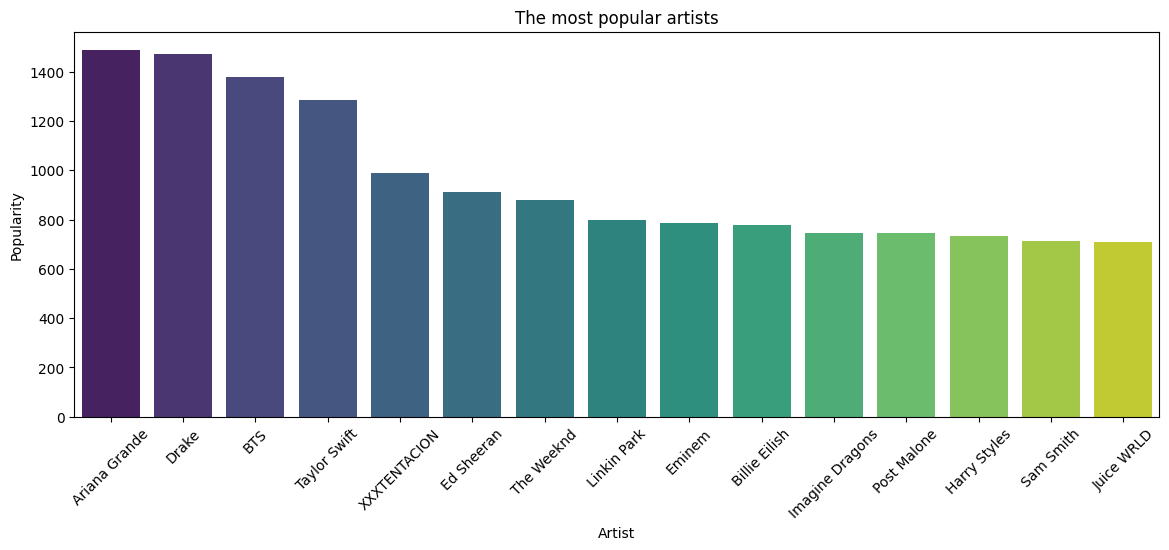

In [127]:
plt.figure(figsize=(14, 5))
sns.barplot(x="Artist", y="Popularity", data=the_best_artists, hue="Artist", palette="viridis")
plt.title("The most popular artists")
plt.xticks(rotation=45)
plt.show()

In [130]:
viral_songs_ariana = df.loc[(df.Popularity_Level=="Viral") & (df.Artist == "Ariana Grande"), ["Title", "Artist", "Genre"]]
viral_songs_ariana

,Title,Artist,Genre
771,breathin,Ariana Grande,dance pop
772,breathin,Ariana Grande,dance pop
773,breathin,Ariana Grande,dance pop
775,breathin,Ariana Grande,dance pop
776,breathin,Ariana Grande,dance pop
...,...,...,...
83865,positions,Ariana Grande,dance pop
83868,positions,Ariana Grande,dance pop
83871,positions,Ariana Grande,dance pop
83877,positions,Ariana Grande,dance pop


In [131]:
viral_songs_drake = df.loc[(df.Popularity_Level=="Viral") & (df.Artist == "Drake"), ["Title", "Artist", "Genre"]]
viral_songs_drake

,Title,Artist,Genre
2932,diplomatic immunity,Drake,canadian hip hop
2937,diplomatic immunity,Drake,canadian hip hop
6073,gods plan,Drake,canadian hip hop
6074,gods plan,Drake,canadian hip hop
6075,gods plan,Drake,canadian hip hop
...,...,...,...
81165,elevate,Drake,canadian hip hop
81172,elevate,Drake,canadian hip hop
81597,jorja interlude,Drake,canadian hip hop
81598,jorja interlude,Drake,canadian hip hop


>> insight: Drake is a popular artist, although genre "canadian hip hop" is not on the top

In [145]:
viral_songs_bts = df.loc[(df.Popularity_Level=="Viral") & (df.Artist == "BTS"), ["Title", "Artist", "Genre"]]
viral_songs_bts

,Title,Artist,Genre
1623,on,BTS,k-pop
1626,on,BTS,k-pop
1631,on,BTS,k-pop
1635,on,BTS,k-pop
1637,on,BTS,k-pop
...,...,...,...
82372,dionysus,BTS,k-pop
82374,dionysus,BTS,k-pop
143082,blood sweat & tears,BTS,k-pop
143083,blood sweat & tears,BTS,k-pop


In [134]:
genre_types_popular


,Artist
Genre,
dance pop,25351
latin,7591
pop,7146
k-pop,4053
n-a,3952
german hip hop,3834
atl hip hop,3668
francoton,3279
dutch hip hop,3257


> most popular songs

In [149]:
song_popu = df[["Title", "Popularity"]].groupby("Title").count()
song_popu.sort_values("Popularity", ascending=False, inplace=True)
song_popu.head(10)

,Popularity
Title,
intro,199
jingle bell rock,142
all night,140
rockstar,138
paradise,136
stay,135
christmas,135
mama,133
friends,127


In [150]:
most_popular_songs = song_popu.loc[song_popu.Popularity > 100, ["Popularity"]]
most_popular_songs.head(10)

,Popularity
Title,
intro,199
jingle bell rock,142
all night,140
rockstar,138
paradise,136
stay,135
christmas,135
mama,133
friends,127


C:\Users\user\AppData\Local\Temp\ipykernel_11932\1900029497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Title", y="Popularity", data=most_popular_songs, hue=None, palette="RdBu")


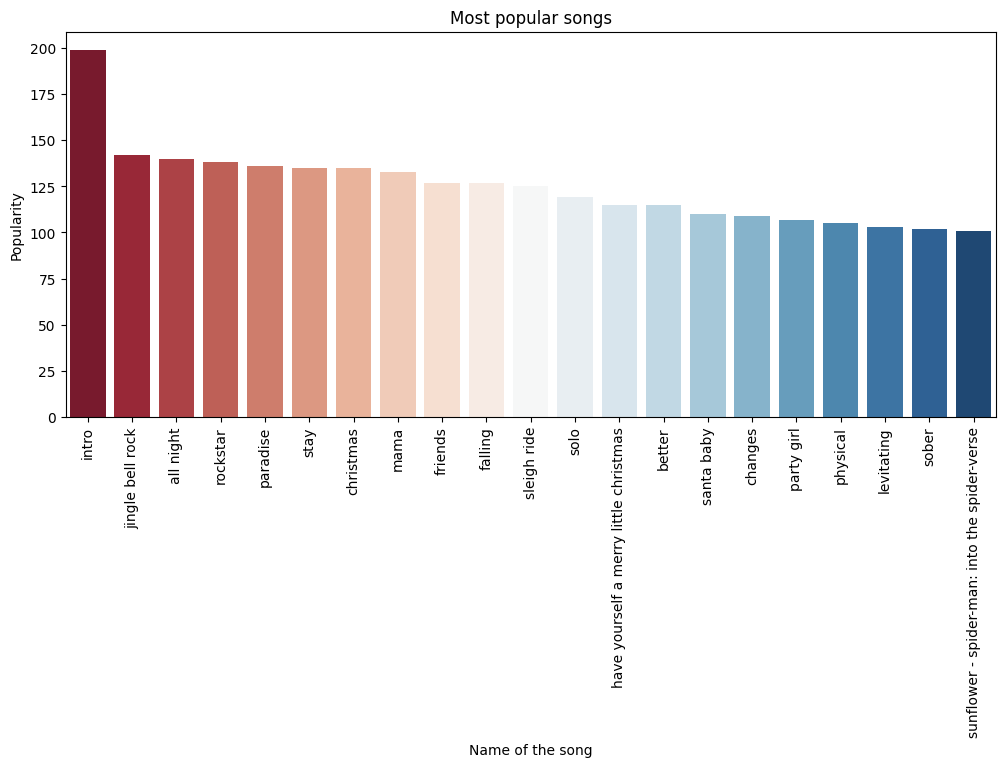

In [151]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Title", y="Popularity", data=most_popular_songs, hue=None, palette="RdBu")
plt.xlabel("Name of the song")
plt.xticks(rotation=90)
plt.title("Most popular songs")
plt.show()

__Insight from Spotify Data Analysis:__ 

<u>Most Popular Genres by Artist Count</u>

The analysis reveals that certain music genres attract a significantly higher number of artists. By grouping data by genre and counting the number of associated artists, it's evident that:

A small subset of genres (those with more than 2,500 artists) dominate the landscape.

These top genre likely include ___dance pop___, which is commonly associated with high commercial presence and broad audience appeal.

The visualization clearly highlights this dominance, offering valuable guidance for understanding genre trends and artist distribution.

This kind of insight is especially useful for music marketers, platform curators, or anyone analyzing market saturation and competition across music genres.

<u> Most Popular Artists and Songs</u>

The analysis highlights both the most dominant artists and the most frequently appearing songs in terms of popularity metrics:

<u>Most Popular Artists</u>

Artists such as ___Ariana Grande___, ___Drake___, and ___BTS___ rank among the top in terms of cumulative song popularity.

These artists also frequently appear in the "Viral" category, showing their consistent ability to produce high-impact, widely shared music across platforms.

<u>Most Popular Songs</u>

Certain songs have appeared over 100 times in the dataset, indicating exceptional streaming consistency or presence across various charts.

The top 10 most popular songs showcase the staying power of hits and the impact of strong fan engagement.

This insight underlines how superstar artists maintain chart dominance, and how viral momentum can translate into long-term popularity—critical information for trend forecasting, digital marketing, and music production strategies.